<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.484244,56.996229,21.524205,3748.255033,3872.259710,3139.602186,732.657525
1,0.0,1.0,36.730035,73.860426,46.055021,-42880.297206,-42713.651725,634.908226,-43348.559951
2,0.0,2.0,38.476189,72.442852,81.709269,23253.395947,23456.024258,-3584.555875,27040.580133
3,0.0,3.0,25.072162,92.770991,57.555219,-95406.736327,-95221.337955,-361.944448,-94859.393507
4,0.0,4.0,79.439625,35.760598,23.737412,-3969.153097,-3820.215462,2650.099374,-6470.314836
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.328502,76.512174,67.763648,-13981.902542,-13782.298219,-3590.167256,-10192.130962
119996,999.0,116.0,54.326423,51.972543,68.232775,-7190.349974,-7005.818232,-2554.235979,-4451.582253
119997,999.0,117.0,50.662353,74.513526,48.719772,14613.480156,14797.375807,-3001.956896,17799.332703
119998,999.0,118.0,81.727365,62.216037,63.665720,9190.772765,9408.381887,-3317.091645,12725.473532


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.484244,56.996229,21.524205,3748.255033,3872.259710,3139.602186,732.657525
1,0.0,1.0,36.730035,73.860426,46.055021,-42880.297206,-42713.651725,634.908226,-43348.559951
2,0.0,2.0,38.476189,72.442852,81.709269,23253.395947,23456.024258,-3584.555875,27040.580133
3,0.0,3.0,25.072162,92.770991,57.555219,-95406.736327,-95221.337955,-361.944448,-94859.393507
4,0.0,4.0,79.439625,35.760598,23.737412,-3969.153097,-3820.215462,2650.099374,-6470.314836
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.328502,76.512174,67.763648,-13981.902542,-13782.298219,-3590.167256,-10192.130962
119996,999.0,116.0,54.326423,51.972543,68.232775,-7190.349974,-7005.818232,-2554.235979,-4451.582253
119997,999.0,117.0,50.662353,74.513526,48.719772,14613.480156,14797.375807,-3001.956896,17799.332703
119998,999.0,118.0,81.727365,62.216037,63.665720,9190.772765,9408.381887,-3317.091645,12725.473532


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    35.484244  56.996229  ...  3139.602186    732.657525
      1.0    36.730035  73.860426  ...   634.908226 -43348.559951
      2.0    38.476189  72.442852  ... -3584.555875  27040.580133
      3.0    25.072162  92.770991  ...  -361.944448 -94859.393507
      4.0    79.439625  35.760598  ...  2650.099374  -6470.314836
...                ...        ...  ...          ...           ...
999.0 115.0  45.328502  76.512174  ... -3590.167256 -10192.130962
      116.0  54.326423  51.972543  ... -2554.235979  -4451.582253
      117.0  50.662353  74.513526  ... -3001.956896  17799.332703
      118.0  81.727365  62.216037  ... -3317.091645  12725.473532
      119.0  80.521958  57.615758  ... -2066.201623   3483.724911

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    35.484244  56.996229  ...  3139.602186    732.657525
      1.0    36.730035  73.860426  ...   634.908226 -43348.559951
      2.0    38.476189  72.442852  ... -3584.555875  27040.580133
      3.0    25.072162  92.770991  ...  -361.944448 -94859.393507
      4.0    79.439625  35.760598  ...  2650.099374  -6470.314836
...                ...        ...  ...          ...           ...
999.0 115.0  45.328502  76.512174  ... -3590.167256 -10192.130962
      116.0  54.326423  51.972543  ... -2554.235979  -4451.582253
      117.0  50.662353  74.513526  ... -3001.956896  17799.332703
      118.0  81.727365  62.216037  ... -3317.091645  12725.473532
      119.0  80.521958  57.615758  ... -2066.201623   3483.724911

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,35.484244,56.996229,21.524205,3748.255033,3872.259710,3139.602186,732.657525
1,0.0,1.0,36.730035,73.860426,46.055021,-42880.297206,-42713.651725,634.908226,-43348.559951
2,0.0,2.0,38.476189,72.442852,81.709269,23253.395947,23456.024258,-3584.555875,27040.580133
3,0.0,3.0,25.072162,92.770991,57.555219,-95406.736327,-95221.337955,-361.944448,-94859.393507
4,0.0,4.0,79.439625,35.760598,23.737412,-3969.153097,-3820.215462,2650.099374,-6470.314836
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.328502,76.512174,67.763648,-13981.902542,-13782.298219,-3590.167256,-10192.130962
119996,999.0,116.0,54.326423,51.972543,68.232775,-7190.349974,-7005.818232,-2554.235979,-4451.582253
119997,999.0,117.0,50.662353,74.513526,48.719772,14613.480156,14797.375807,-3001.956896,17799.332703
119998,999.0,118.0,81.727365,62.216037,63.665720,9190.772765,9408.381887,-3317.091645,12725.473532


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    35.484244  56.996229  ...  3139.602186    732.657525
      1.0    36.730035  73.860426  ...   634.908226 -43348.559951
      2.0    38.476189  72.442852  ... -3584.555875  27040.580133
      3.0    25.072162  92.770991  ...  -361.944448 -94859.393507
      4.0    79.439625  35.760598  ...  2650.099374  -6470.314836
...                ...        ...  ...          ...           ...
999.0 115.0  45.328502  76.512174  ... -3590.167256 -10192.130962
      116.0  54.326423  51.972543  ... -2554.235979  -4451.582253
      117.0  50.662353  74.513526  ... -3001.956896  17799.332703
      118.0  81.727365  62.216037  ... -3317.091645  12725.473532
      119.0  80.521958  57.615758  ... -2066.201623   3483.724911

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

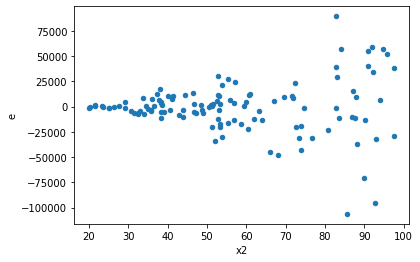

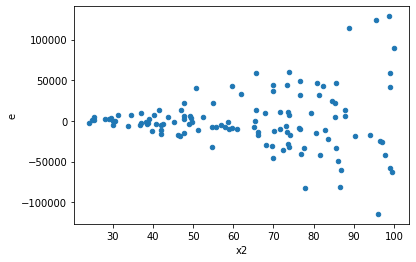

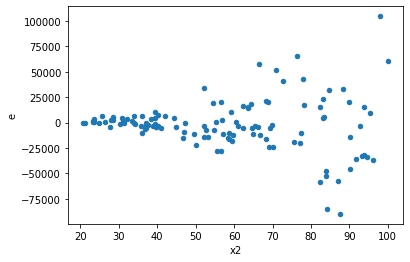

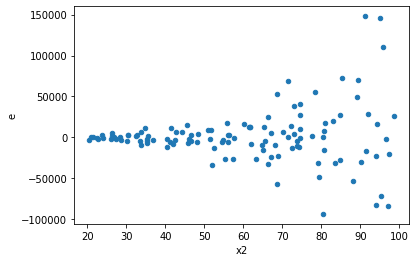

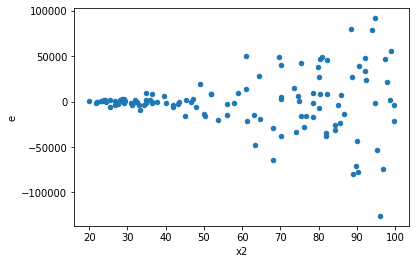

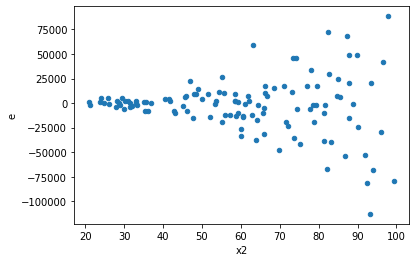

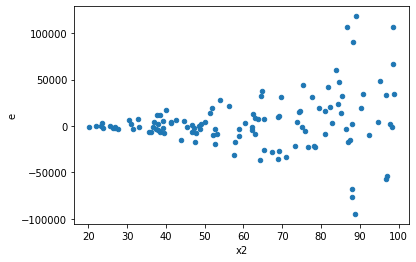

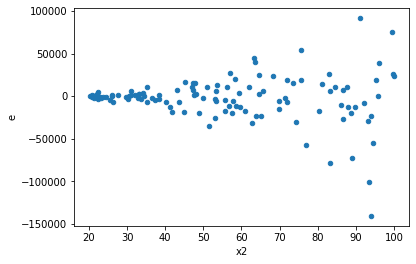

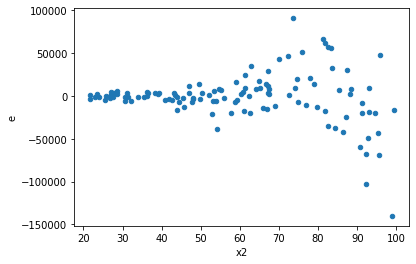

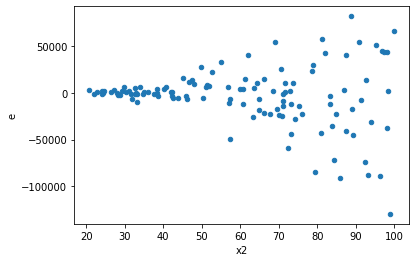

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,66395352757.89552,1973580156.422626,1508985289.952171,44854094.46415059,33.642085699851094,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,125773259779.33624,6250884180.263202,2858483176.8030963,142065549.5514364,20.120875087792843,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,69016696918.3897,1330547173.3247886,1568561293.5997658,30239708.484654285,51.87091318673796,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,125466069062.53697,2304169537.5100803,2851501569.603113,52367489.488865465,54.451752364592686,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,88785523403.01282,1053213441.7195965,2017852804.6139276,23936669.12999083,84.29964894679985,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,83215553028.84872,3084140830.1504636,1891262568.837471,70094109.7761469,26.981761732582413,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,78791399065.14157,2246849984.844675,1790713615.116854,51064772.382833526,35.06749431274933,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,77681033672.1438,1867826760.997379,1765478038.0032682,42450608.204485886,41.58899277718015,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,57745029490.85168,1264224846.847437,1312387033.8829927,28732382.882896293,45.67623365008913,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,66395352757.89552,1973580156.422626,1508985289.952171,44854094.46415059,33.642085699851094,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,125773259779.33624,6250884180.263202,2858483176.8030963,142065549.5514364,20.120875087792843,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,69016696918.3897,1330547173.3247886,1568561293.5997658,30239708.484654285,51.87091318673796,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,125466069062.53697,2304169537.5100803,2851501569.603113,52367489.488865465,54.451752364592686,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,88785523403.01282,1053213441.7195965,2017852804.6139276,23936669.12999083,84.29964894679985,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,83215553028.84872,3084140830.1504636,1891262568.837471,70094109.7761469,26.981761732582413,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,78791399065.14157,2246849984.844675,1790713615.116854,51064772.382833526,35.06749431274933,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,77681033672.1438,1867826760.997379,1765478038.0032682,42450608.204485886,41.58899277718015,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,57745029490.85168,1264224846.847437,1312387033.8829927,28732382.882896293,45.67623365008913,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64